<a href="https://colab.research.google.com/github/brunaguedes92/LogProgPythonN2/blob/main/Atividade3_Pratica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LISTA DE EXERCÍCIOS

01. Acesse o conjunto de dados, acerca dos aluguéis de São Paulo, e investigue:
a. A informações sobre os atributos;
b. Quais são suas colunas (use head e columns);
c. Se existe algum valor nulo;
d. Crie uma nova coluna, chamada 'valor_extra_pago' que indica o valor das
taxas que serão pagas. Esse valor é obtido pela subtração entre o 'total' e 'rent'.


In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('/content/data.csv')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [6]:
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [7]:
dados.columns

Index(['address', 'district', 'area', 'bedrooms', 'garage', 'type', 'rent',
       'total'],
      dtype='object')

In [8]:
dados.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [9]:
dados['valor_extra_pago'] = dados['total'] - dados['rent']

In [10]:
dados.head(3)

,address,district,area,bedrooms,garage,type,rent,total,valor_extra_pago
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,661


02. Usando as funções de estatística da biblioteca pandas responda as questões a seguir:
a. Qual o valor do aluguel mais barato nos dados? Qual o valor do mais caro?
b. Usando query como estratégia de filtro sobre os dados, apresente todas as
colunas do Dataframe, que tem o valor do aluguel igual ao valor mínimo ou
igual ao valor máximo.
c. Verifique e plote os TOP 5 imóveis disponíveis para aluguel, considerando-os
por distrito. Para obtenção do resultado gráfico, use um gráfico de barras na
horizontal (dica: use value_counts() e sort_values()).



In [11]:
mais_barato = dados['rent'].min()
mais_barato

500

In [12]:
mais_caro = dados['rent'].max()
mais_caro

25000

In [13]:
dados.query('rent == @mais_barato or rent == @mais_caro')

,address,district,area,bedrooms,garage,type,rent,total,valor_extra_pago
51,Rua Tanque Velho,Vila Nivi,45,1,0,Casa,500,551,51
1188,Viela Renaldo Laporta,Vila Aurora (zona Norte),30,1,0,Casa,500,521,21
4741,Rua Manoel Oliveira Gonçalves,Jardim Jaçanã,30,1,0,Casa,500,509,9
5901,Rua Manuel José Rodrigues,Sacoma,40,1,0,Casa,500,521,21
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710,1710
6428,Rua Eugênia S Vitale,Taboão,30,1,0,Studio e kitnet,500,594,94
7420,Rua Manuel José Rodrigues,Sacoma,20,1,0,Casa,500,521,21
10559,Rua Arraial de São Bartolomeu,Vila Carmosina,70,2,0,Casa,500,821,321


Verifique e plote os TOP 5 imóveis disponíveis para aluguel, considerando-os por distrito. Para obtenção do resultado gráfico, use um gráfico de barras na horizontal (dica: use value_counts() e sort_values()).

In [14]:
print(dados['district'])

0                     Belenzinho
1                   Vila Marieta
2                      Pinheiros
3                        Vila Ré
4                     Bela Vista
                  ...           
11652                Santo Amaro
11653       Jardim Vitória Régia
11654           Jardim Caravelas
11655    Jardim Fonte do Morumbi
11656                Santo Amaro
Name: district, Length: 11657, dtype: object


In [15]:
dados['district'].value_counts()

Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: district, Length: 1199, dtype: int64

<Axes: >

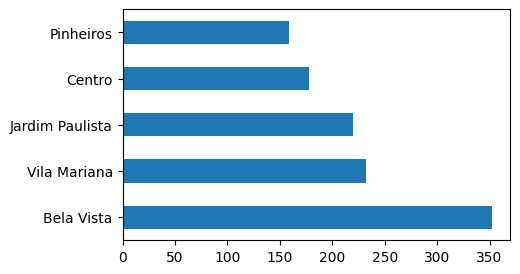

In [16]:
dados['district'].value_counts().sort_values(ascending = False)[0:5].plot(kind = 'barh', figsize = (5,3))

03. Usando agrupamento (groupby), verifique o valor médio dos aluguéis por distrito.
Apresente os TOP 10 valores mais caros obtidos.


04. Faça um código que apresente: o endereço, o tipo do imóvel, o valor do aluguel, a
área, a quantidade de quartos e vagas de garagem, dos imóveis localizados no distrito
Vila Madalena, com valores de aluguéis menores que 3000 (dica: use query para
filtrar os valores e loc para obter os resultados das colunas).
05. Crie um novo dataframe a partir dos dados de aluguéis de SP, que atenda aos
seguintes critérios: Apartamento de 2 quartos, com aluguel menor que 3 mil e
área maior que 70 metros quadrados. Faça o que se pede:
a. Usando o dataframe obtido, apresente o gráfico com os 10 menores
valores médios dos aluguéis, por distrito.

In [18]:
filtro = dados.query("type == 'Apartamento' and bedrooms ==2 and rent <3000 and area > 70")

In [19]:
filtro.head()

,address,district,area,bedrooms,garage,type,rent,total,valor_extra_pago
512,Rua dos Trilhos,Mooca,90,2,0,Apartamento,2450,2482,32
522,Rua Brasil,Rudge Ramos,73,2,2,Apartamento,2100,2687,587
525,Rua Leandro de Carvalho,Vila Monumento,95,2,2,Apartamento,2570,2843,273
570,Rua Emílio Ribas,Jardim Pazini,80,2,0,Apartamento,1550,1640,90
726,Rua Ribeiro de Lima,Bom Retiro,114,2,0,Apartamento,2500,3388,888


<Axes: title={'center': '10 menores valores de Alugueis por Distrito'}, xlabel='Valor médio dos aluguéis', ylabel='Distrito'>

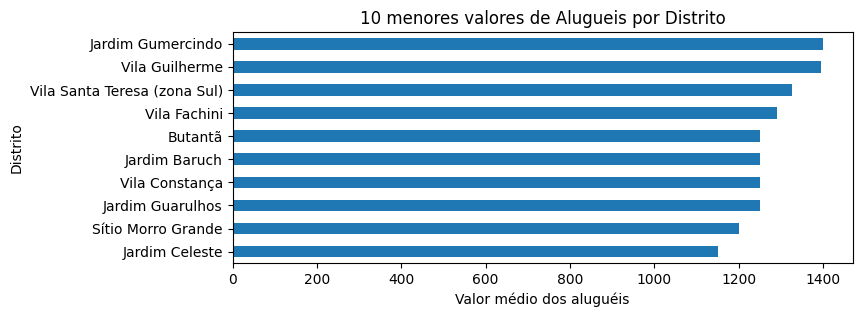

In [25]:
dados_por_distrito = filtro.groupby('district').mean(numeric_only=True)['rent'].sort_values(ascending=True)[0:10]
dados_por_distrito.plot(kind='barh', figsize=(8,3), title = '10 menores valores de Alugueis por Distrito', xlabel = 'Valor médio dos aluguéis', ylabel= 'Distrito')